# CA1: Recognition of emotions through facial expression


CONVOLUTIONAL NEURAL NETWORKS WITH SCIKIT-LEARN, KERAS AND H2O

Libraries

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
sns.set("talk","ticks",font_scale=1, font="Calibri")
import os

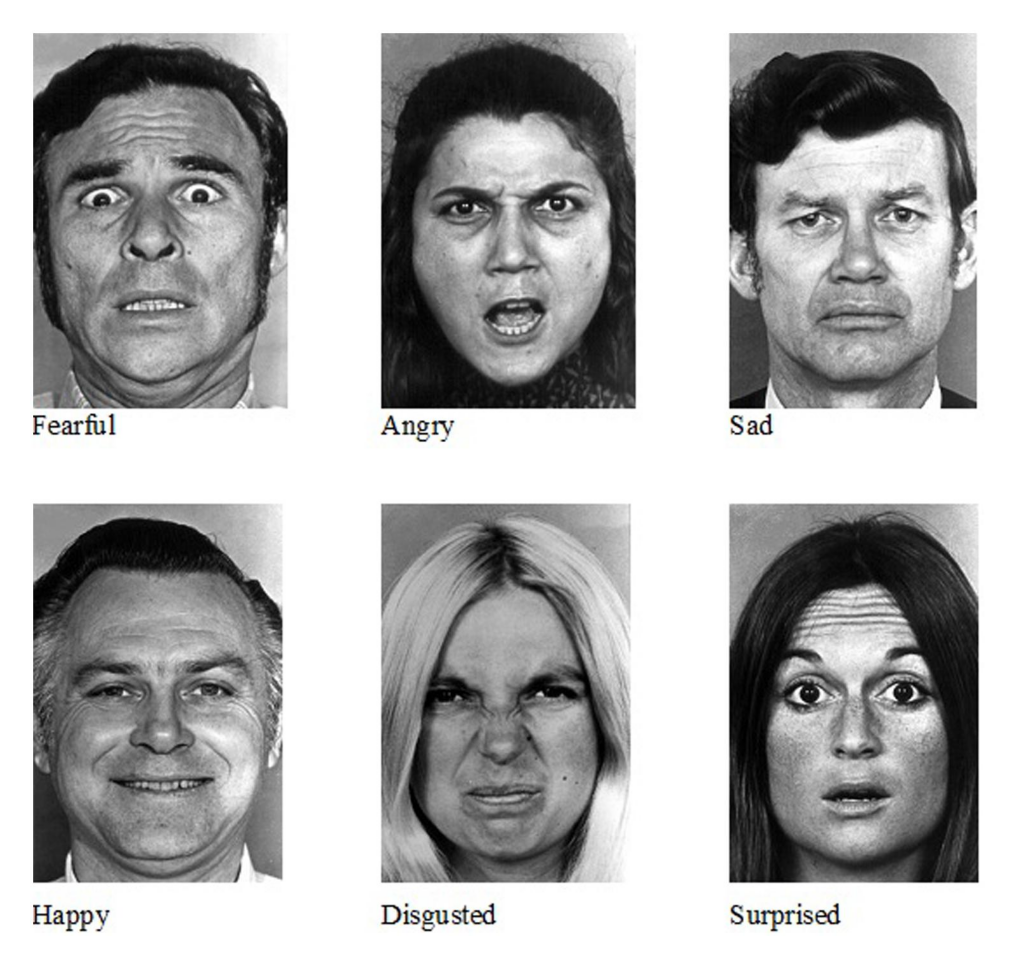

In [6]:
pic= Image.open("PICS.jpg")
plt.imshow(pic)
plt.axis('off')
pic.show()

In [4]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                file_path = os.path.join(class_path, filename)
                image = Image.open(file_path)
                images.append(image)
                labels.append(class_name)
    return images, labels

train_folder_path = "Home/Desktop/CA1Diana/train"
test_folder_path = "ruta/a/la/carpeta/test"

train_images, train_labels = load_images_from_folder(train_folder_path)
test_images, test_labels = load_images_from_folder(test_folder_path)

# Mostrar una imagen de entrenamiento de ejemplo
plt.imshow(train_images[0])
plt.title("Clase: " + train_labels[0])
plt.axis("off")
plt.show()

# Mostrar una imagen de prueba de ejemplo
plt.imshow(test_images[0])
plt.title("Clase: " + test_labels[0])
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'ruta/a/la/carpeta/train'

keras imports for the dataset and building our neural network

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow.keras as keras

In [ ]:
from keras.datasets import mnist

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Conv2D, MaxPool2D, Flatten
from keras import utils
from sklearn.metrics import accuracy_score

loading the dataset

In [41]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

building the input vector from the 28x28 pixels

In [42]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

normalizing the data to help with the training

In [43]:
X_train /= 255
X_test /= 255

one-hot encoding using keras' numpy-related utilities

In [44]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)


In [45]:
Y_train = utils.to_categorical(y_train, num_classes=n_classes)
Y_test = utils.to_categorical(y_test, num_classes=n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape after one-hot encoding:  (60000, 10)


building a linear stack of layers with the sequential model

In [46]:
pip install --upgrade keras tensorflow

In [47]:
model = Sequential()

# convolutional layer(Experiment with the 25 number, unput_shape(size of the layer))
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))

#MaxPool to reduce the features
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer (ESTUDIAR reLU) REDUCE FROM 28 TO 26  
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

compiling the sequential model _ LOSS FUNTION

In [50]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

training the model for 10 epochs

In [51]:
#Epochs, number of observation that I am using 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9841 - val_loss: 0.0610
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9839 - val_loss: 0.0633
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9848 - val_loss: 0.0648
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9854 - val_loss: 0.0629
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9844 - val_loss: 0.0668
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9838 - val_loss: 0.0697
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9842 - val_loss: 0.0683
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9996 - loss: 0.0018 - 